# BASIC IDEA OF THE KERNEL

The data consists of a one dimensional time series x with 600 Mio data points. 

At test time, we will see a time series of length 150'000 to predict the next earthquake.

The idea of this kernel is to randomly sample chunks of length 150'000 from x, 

derive some features and use them to update weights of a recurrent neural net with 150'000 / 1000 = 150 time steps. 

In [3]:
import numpy as np 
import pandas as pd
import os
from tqdm import tqdm, tqdm_notebook
from scipy import stats
from random import choice

from scipy.signal import hilbert, hann, convolve
from sklearn.linear_model import LinearRegression

#from joblib import Parallel, delayed
import gc


import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# Fix seeds
from numpy.random import seed
seed(639)
from tensorflow import set_random_seed
set_random_seed(5944)

In [4]:
#df_train = pd.read_csv("../input/train.csv", dtype={"acoustic_data": np.int16, "time_to_failure": np.float32})
#df_train.to_hdf("../input/train.hdf", key='0')

In [5]:
# Import
#float_data = pd.read_csv("../input/train.csv", dtype={"acoustic_data": np.float32, "time_to_failure": np.float32}).values
df_train = pd.read_hdf("../input/train.hdf", key='0')

In [6]:
#df_train_h = df_train.head(100000000)
df_train['diff_time_to_failure'] = 0
df_train.iloc[0:-1,2] = df_train['time_to_failure'].diff().dropna().values
df_train['is_failure'] = df_train['diff_time_to_failure'] > 0

In [ ]:
# 直近のFailureまでの時間を計算する
# 0.0010sec/4096line

df_train['time_to_nearest_failure']


In [51]:
df_train.head()

,acoustic_data,time_to_failure,diff_time_to_failure,is_failure
0,12,1.4691,0.0,False
1,6,1.4691,0.0,False
2,8,1.4691,0.0,False
3,5,1.4691,0.0,False
4,8,1.4691,0.0,False


In [33]:
fail_indexs = np.array(df_train[df_train['is_failure']].index)
fail_border_indexs = []
for i in range(len(fail_indexs)-1):
    fail_border_indexs.append(int(np.ceil(np.mean(fail_indexs[i:i+2]))))

In [62]:
np.linspace(0,-10,11)

array([  0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10.])

In [ ]:
df = df_train.head(10000000)
df['nearest_failure_index'] = [ for i in tqdm_notebook(range(df.shape)):
    

In [63]:
fail_border_indexs

[27871225,
 77381616,
 121724904,
 163207136,
 203147224,
 232241107,
 276834250,
 323057601,
 356827067,
 397373363,
 440590251,
 478805923,
 512288669,
 557172629,
 603776908]

In [ ]:
unit_time = np.round(0.0010/4096,10)

for k in tqdm_notebook(len(nearest_fail_index)):
    nearest_fail_index = fail_indexs[k]
    fail_border_index = fail_border_indexs[k]


time_to_nearest_failures = np.zeros(df_train.shape[0],)

# fail_count = 0
# for i in tqdm_notebook(range(df_train.shape[0])):
    
#     # 最近のFailureを更新する
#     if fail_border_index <= i:
#         fail_count += 1
#         nearest_fail_index = fail_indexs[fail_count]
#         fail_border_index = fail_border_indexs[fail_count]
    
#     time_to_nearest_failures[i] = (nearest_fail_index - i)*unit_time





nearest_ttfs = [(nearest_fail_index-i)*unit_time for i in range(0,fail_border_index)]

# ini_index = nearest_fail_index*unit_time
# #nearest_ttfs = np.linspace(ini_index, fail_border_index, fail_border_index-ini_index+1)

# tmp_index = 0

# # 

In [52]:
nearest_fail_index = fail_indexs[0]
fail_border_index = fail_border_indexs[0]
unit_time = np.round(0.0010/4096,10)

time_to_nearest_failures = np.zeros(df_train.shape[0],)

# fail_count = 0
# for i in tqdm_notebook(range(df_train.shape[0])):
    
#     # 最近のFailureを更新する
#     if fail_border_index <= i:
#         fail_count += 1
#         nearest_fail_index = fail_indexs[fail_count]
#         fail_border_index = fail_border_indexs[fail_count]
    
#     time_to_nearest_failures[i] = (nearest_fail_index - i)*unit_time





nearest_ttfs = [(nearest_fail_index-i)*unit_time for i in range(0,fail_border_index)]

# ini_index = nearest_fail_index*unit_time
# #nearest_ttfs = np.linspace(ini_index, fail_border_index, fail_border_index-ini_index+1)

# tmp_index = 0

# # 

KeyboardInterrupt: 

In [50]:
nearest_ttfs[-10:-1]

[-5.4225941122000005,
 -5.4225943563,
 -5.4225946004,
 -5.422594844500001,
 -5.4225950886000005,
 -5.4225953327,
 -5.422595576800001,
 -5.422595820900001,
 -5.4225960650000005]

In [34]:
fail_indexs

array([  5656573,  50085877, 104677355, 138772452, 187641819, 218652629,
       245829584, 307838916, 338276286, 375377847, 419368879, 461811622,
       495800224, 528777114, 585568143, 621985672], dtype=int64)

In [35]:
fail_border_indexs

[27871225,
 77381616,
 121724904,
 163207136,
 203147224,
 232241107,
 276834250,
 323057601,
 356827067,
 397373363,
 440590251,
 478805923,
 512288669,
 557172629,
 603776908]

In [10]:
df_train[df_train['diff_time_to_failure'] < 0]['diff_time_to_failure'].median()

-1.4901161193847656e-08

In [53]:
(df_train['time_to_failure'].values[100] - df_train['time_to_failure'].values[200])/100


1.1920928955078125e-09

In [22]:
# 0.0010sec/4096line
unit_time = np.round(0.0010/4096,10)

2.441e-07

In [16]:
df_train[df_train.diff_time_to_failure < -0.0001]

,acoustic_data,time_to_failure,diff_time_to_failure,is_failure
4094,3,1.469095,-0.000996,False
8190,17,1.468095,-0.001095,False
12286,10,1.466995,-0.001096,False
16382,0,1.465896,-0.000996,False
20478,10,1.464895,-0.001096,False
24574,7,1.463795,-0.000995,False
28670,6,1.462795,-0.001096,False
32766,1,1.461695,-0.001095,False
36862,8,1.460595,-0.000996,False
40958,5,1.459595,-0.001095,False


In [ ]:
-1.105

In [1]:
-1.192093e-07

-1.192093e-07

In [2]:
df_train[df_train['time_to_failure'] == 1.469099].head(110)

NameError: name 'df_train' is not defined

In [46]:
df_train[df_train.is_failure]

,acoustic_data,time_to_failure,diff_time_to_failure,is_failure
5656573,4,0.000795,11.540005,True
50085877,8,0.000695,14.179905,True
104677355,6,0.000795,8.855905,True
138772452,3,0.001095,12.692904,True
187641819,7,0.000595,8.054905,True
218652629,5,0.001095,7.057905,True
245829584,1,0.000495,16.106905,True
307838916,7,0.000695,7.904904,True
338276286,4,0.000195,9.636905,True
375377847,0,0.000495,11.425904,True


In [38]:
df_train_h.iloc[0:-2,2].shape

(99999998,)

In [33]:
diff_time_to_failures.shape

(99999999,)

In [43]:
#df_train_h
df_train_h[df_train_h.is_failure]

,acoustic_data,time_to_failure,diff_time_to_failure,is_failure
5656573,4,0.000795,11.540005,True
50085877,8,0.000695,14.179905,True


In [26]:
df_train_h.iloc[5656550:5656590]

,acoustic_data,time_to_failure,diff_time_to_failure,is_failure
5656550,8.0,0.000796,-1.105946e-09,False
5656551,8.0,0.000796,-1.105946e-09,False
5656552,8.0,0.000796,-1.105946e-09,False
5656553,11.0,0.000796,-1.105946e-09,False
5656554,5.0,0.000796,-1.105946e-09,False
5656555,2.0,0.000795,-1.105946e-09,False
5656556,5.0,0.000795,-1.047738e-09,False
5656557,6.0,0.000795,-1.105946e-09,False
5656558,1.0,0.000795,-1.105946e-09,False
5656559,2.0,0.000795,-1.105946e-09,False


In [ ]:
# time_to_failureが減少から増加に転じたときに、地震が発生したとする
df_train['diff_time_to_failure'] = 0
df_train['diff_time_to_failure'].iloc[0:-2] = df_train['time_to_failure'].diff()[1:]   

In [ ]:
df_train['diff_time_to_failure']

In [ ]:
df_train['is_failure'] = df_train['diff_time_to_failure']] > 0

In [12]:
df_train_head = df_train.head(10000000)
df_train_head[df_train_head.diff_time_to_failure > 0]

,acoustic_data,time_to_failure,diff_time_to_failure
5656574,4.0,11.5408,11.540005


In [25]:
df_train['time_to_nearest_failure'] = 

,acoustic_data,time_to_failure
0,12.0,1.469100
1,6.0,1.469100
2,8.0,1.469100
3,5.0,1.469100
4,8.0,1.469100
5,8.0,1.469100
6,9.0,1.469100
7,7.0,1.469100
8,-5.0,1.469100
9,3.0,1.469100


In [16]:
# The generator endlessly selects "batch_size" ending positions of sub-time series. For each ending position,
# the "time_to_failure" serves as target, while the features are created by the function "create_X".
class DataGenerator():
    def __init__(self, acoustic_data, time_to_failures, n_segment=3, min_index=0, max_index=None, 
                 batch_size=32, n_step=150, step_length=1000, normalize=False, verbose=0):
        self.verbose = verbose 
        self.normalize = normalize 
        
        # Normalize
        self.avg_acoustic_data = acoustic_data.mean()
        self.std_acoustic_data = acoustic_data.std()
        if self.normalize:
            self.acoustic_data = (acoustic_data - self.avg_acoustic_data) / self.std_acoustic_data
        else:   
            self.acoustic_data = acoustic_data
        self.min_acoustic_data = acoustic_data.min()

        self.time_to_failures = time_to_failures
        if self.verbose > 0:
            print('[init] acoustic_data.shape=', acoustic_data.shape, ', time_to_failures.shape=', time_to_failures.shape,)
        
        self.n_segment = n_segment
        
        self.min_index = min_index        
        if max_index is None:
            max_index = len(acoustic_data) - 1
        self.max_index = max_index
        
        self.batch_size = batch_size
        self.n_step = n_step
        self.step_length = step_length
    
        # n_step*step_length=150000以上のデータ数がある区間をsegmentとして登録
        self.segment_length = len(self.acoustic_data)//self.n_segment
        
        # If segemnt is too small to get sample data, return error.
        assert self.n_step * self.step_length <= self.segment_length - 1
    
        if self.verbose > 0:
            print('[init]', end='')
        self.n_feature = self.create_X(acoustic_data[0:n_step*step_length]).shape[1]     
        #self.n_feature = 3*9 # 特徴量追加時に修正
 
        self.segment_last_indexs = [0]
        for i in range(self.n_segment):
            if i+1 == self.n_segment:
                self.segment_last_indexs.append(self.max_index)
            else:
                self.segment_last_indexs.append(self.segment_length*(i+1))
       
        # Validationデータの生成区間（初期値はsegment_0）
        self.valid_segment = 0
        self.min_valid_index = -1    
        self.max_valid_index = -1
        self.set_valid_segment(self.valid_segment)
    
        # 過去に生成したデータのキャッシュ
        self.last_index_to_gen_sample = {}

    def set_valid_segment(self, valid_segment):
        """
        Validationデータの生成区間を指定
        """
        self.valid_segment = valid_segment
        self.min_valid_index = self.segment_last_indexs[self.valid_segment]     
        self.max_valid_index = self.segment_last_indexs[self.valid_segment+1]

    def generate_train(self):
        """
        Return train-data generator
        """
        
        while True:       
            # 全区間からvalidの区間を除く区間からデータを生成するGeneratorを返す
            yield self.pick_random_data(self.min_index, self.max_index, self.min_valid_index, self.max_valid_index)

    def generate_valid(self):
        """
        Return valid-data generator
        """
        while True:       
            # validの区間からデータを生成するGeneratorを返す
            yield self.pick_random_data(self.min_valid_index, self.max_valid_index)
    
    def generate_sequence_data(self, sta_index, last_index, interval=1000):
        """
        sta_index<=idx<=last_indexの範囲で連続した学習データを生成する
        """
        # 生成するデータの長さが確保できるよう、indexを修正
        if sta_index  < self.n_step * self.step_length:
            sta_index = self.n_step * self.step_length
        
        n_gen = (last_index - sta_index + 1)//interval
        
        # Initialize feature matrices and targets
        #last_indexs = np.zeros(n_gen, )
        samples = np.zeros((n_gen, self.n_step, self.n_feature))
        targets = np.zeros(n_gen, )
        acoustic_vals = np.zeros(n_gen, )
        
        for i in tqdm_notebook(range(n_gen)): 
            idx = sta_index + i*interval
            #last_indexs[i] = idx
            samples[i] = self.create_X(self.acoustic_data, last_index=idx)
            targets[i] = self.time_to_failures[idx]
            acoustic_vals[i] = self.acoustic_data[idx]
        return samples, targets, acoustic_vals
    
    def convert_test(self, test_acoustic_data):
        """
        CSVファイルから読み込んだままのテストデータを入力して
        学習時と同条件の正規化・特徴量変換したデータを返す
        """
        if self.normalize:
            x_test = (test_acoustic_data - self.avg_acoustic_data) / self.std_acoustic_data           
        else:   
            x_test = test_acoustic_data
        return np.expand_dims(self.create_X(x_test), 0)

    def pick_random_data(self, min_pick_index, max_pick_index, min_reject_index=None, max_reject_index=None):
        """
        Return samples & targets between min_pick_index ~ max_pick_index randomly
        """
        # data_length分のデータを抽出可能なようにマージンを持たせてindexをランダムサンプリングする
        data_length = self.n_step * self.step_length
        
        if self.verbose > 0:
            print('[get_random_pick_data]',
                  'min/max_pick_index=', min_pick_index, max_pick_index, 
                  'min/max_reject_index=', min_reject_index, max_reject_index,
                  'data_length=', data_length)
        
        # If segemnt is too small to get sample data, return error.
        assert min_pick_index + data_length < max_pick_index
   
        if min_reject_index is not None and max_reject_index is not None:
            # Pick indices of ending positions except min_reject_index ~ max_reject_index
            idxs = self.get_randint(size=self.batch_size, 
                                    min_pick_index=min_pick_index + data_length, 
                                    max_pick_index=max_pick_index, 
                                    min_reject_index=min_reject_index,
                                    max_reject_index=max_reject_index + data_length)
        else:
            # Pick indices of ending positions
            idxs = np.random.randint(min_pick_index + data_length, max_pick_index, size=self.batch_size)

        # Initialize feature matrices and targets
        samples = np.zeros((self.batch_size, self.n_step, self.n_feature))
        targets = np.zeros(self.batch_size, )
        
        for j, idx in enumerate(idxs):
            if self.verbose > 0:
                print('[get_random_pick_data] ', j, '/', self.batch_size)
            if idx not in self.last_index_to_gen_sample:
                self.last_index_to_gen_sample[idx] = self.create_X(self.acoustic_data, last_index=idx)
                
            #print(self.last_index_to_gen_sample[r])
            samples[j] = self.last_index_to_gen_sample[idx]
            targets[j] = self.time_to_failures[idx-1]
        return samples, targets

    def get_randint(self, size, min_pick_index, max_pick_index, min_reject_index=None, max_reject_index=None):
        """
        min_pick_index <= idx <= max_pick_index の範囲にあり、
        min_reject_index <= idx <= max_reject_index の範囲に含まれない
        ランダムなsize個の整数列を生成する
        """
        
        assert min_pick_index < max_pick_index
        assert min_reject_index < max_reject_index
        
        if min_reject_index is None or max_reject_index is None:
            # どちらかの除外区間なしの場合はrandintをそのまま使う
            return np.random.randint(min_pick_index, max_pick_index, n_sample)

        rand_indexs = []
        while len(rand_indexs) < size:
            idx = np.random.randint(min_pick_index, max_pick_index)     
            if idx < min_reject_index or max_reject_index < idx:
                rand_indexs.append(idx)

        return rand_indexs

    def create_X(self, acoustic_data, last_index=None, n_step=None, step_length=None):
        """
        For a given ending position "last_index", we split the last 150'000 values 
        of "x" into 150 pieces of length 1000 each. So n_step * step_length should equal 150'000.
        From each piece, a set features are extracted. This results in a feature matrix 
        of dimension (150 time steps x features).  
        """
        if last_index == None:
            last_index=len(acoustic_data)
        if n_step == None:    
            n_step=self.n_step
        if step_length == None:                                                               
            step_length=self.step_length
            
        assert last_index - n_step * step_length >= 0

        if self.verbose > 0:
            print('[create_X] last_index=', last_index, ', n_step=', n_step, ', step_length=', step_length, ', acoustic_data.shape=', acoustic_data.shape)
            
        # Reshaping and approximate standardization with mean 5 and std 3.
        #tmp_data = (acoustic_data[(last_index - n_step * step_length):last_index].reshape(n_step, -1) - 5 ) / 3
        tmp_data = acoustic_data[(last_index - n_step * step_length):last_index].reshape(n_step, -1)
        
        # Extracts features of sequences of full length 1000, of the last 100 and 10 observations. 
        feats = np.c_[self.extract_features(tmp_data),
                      self.extract_features(tmp_data[:, -step_length // 10:]),
                      self.extract_features(tmp_data[:, -step_length // 100:])]
        
        if self.verbose >= 2:
            print('feature matrix=')
            print(feats)
        
        return feats

    def get_rolling_std_quantiles(self, z, window, quantiles):
        """
        2次元配列z(m*n幅windowごとに標準偏差をとり
        そのquantile点(k個)を抽出したm*k行列(ndarray)を返す
        """
        if self.verbose > 0:
            print('[get_rolling_std_quantiles] z.shape =', z.shape, ',  window=', window, ', quantiles=', quantiles)
            
        feats = np.zeros([z.shape[0], len(quantiles)])
        for i in range(z.shape[0]):
            # Windowを変化させrolling特徴量を生成
            #zs_i = pd.Series(z[i])
            #z_roll_std_i = zs_i.rolling(window).std().dropna().values
            z_roll_std_i = self.rolling_window(z, window).std(axis=1)
            for j,q in enumerate(quantiles):
                feats[i,j] = np.quantile(z_roll_std_i, q)
                
        return feats
    
    def rolling_window(self, a, window):
        shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
        strides = a.strides + (a.strides[-1],)
        return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    
    def extract_features(self, z):
        """
        Helper function for the data generator. Extracts mean, standard deviation, and quantiles per time step.
        Can easily be extended. Expects a two dimensional array.
        z:2D-array(m*n)
        return:features(m*x)
        """
        if self.verbose > 0:
            print('[extract_features] z.shape=' ,z.shape)

        z_abs_diff = np.abs(np.diff(z, axis=1))

        features = np.c_[z.mean(axis=1), 
                         z.min(axis=1),
                         z.max(axis=1),
                         z.std(axis=1),
#                          np.quantile(z,0.05, axis=1),
#                          np.quantile(z,0.10, axis=1),
#                          np.quantile(z,0.90, axis=1),
#                          np.quantile(z,0.95, axis=1),
                         (z**2).mean(axis=1),
                         (1/(z+0.01)).mean(axis=1),
                         np.log(np.abs(z)+1).mean(axis=1),   
                         z_abs_diff.mean(axis=1),
                         z_abs_diff.min(axis=1),
                         z_abs_diff.max(axis=1),
                         z_abs_diff.std(axis=1),
#                          np.quantile(z_abs_diff,0.05, axis=1),
#                          np.quantile(z_abs_diff,0.10, axis=1),
#                          np.quantile(z_abs_diff,0.90, axis=1),
#                          np.quantile(z_abs_diff,0.95, axis=1),
                         (z_abs_diff**2).mean(axis=1),
                         (1/(z_abs_diff+0.01)).mean(axis=1),
                         np.log(z_abs_diff+1).mean(axis=1)
                        ]
        return features
    
    
#     def is_train_range_index(self, last_index):
#         """
#         Train区間内で、self.n_step * self.step_lengthだけのデータが確保可能な区間を指定するindexか判定
#         """
#         first_index = last_index - self.n_step * self.step_length
#         if last_index < self.min_index or self.max_index < last_index:
#             # last_indexがデータの定義域を超えている場合False
#             return False
#         elif first_index < self.min_index or self.max_index < first_index:
#             # first_indexがデータの定義域を超えている場合False
#             return False
#         elif self.min_valid_index <= first_index and last_index <= self.max_valid_index:
#             # Validation区間に含まれている場合False
#             return False
#         else:
#             return True

# Train With Folds

In [5]:
# Define model
from keras.models import Sequential, load_model
from keras.layers import Dense, CuDNNGRU, Bidirectional
from keras.optimizers import adam
from keras.callbacks import ModelCheckpoint, TensorBoard

In [17]:
# Initialize generators
batch_size = 32
fold = 4

data_generator = DataGenerator(acoustic_data=df_train['acoustic_data'].values, 
                               time_to_failures=df_train['time_to_failure'].values, 
                               n_segment=fold, n_step=150, step_length=1000)

n_feature = data_generator.n_feature
print('n_feature=', n_feature)
print('segment_last_indexs=', data_generator.segment_last_indexs)

n_feature= 42
segment_last_indexs= [0, 157286370, 314572740, 471859110, 629145479]


In [17]:
steps_per_epoch=1000
epochs=15

fold_to_model = {}
fold_to_history = {}

for i in [0]: #range(fold):
    print('//// Fold=', i+1, '////')
    # データ区間を設定
    data_generator.set_valid_segment(i)
    train_gen = data_generator.generate_train()
    valid_gen = data_generator.generate_valid()
    #n_feature = data_generator.n_feature

    cb = [
        ModelCheckpoint("../model/model_CuDNNGRU_Fold-" + str(i+1) + ".hdf5", save_best_only=True, period=1),
        #TensorBoard(log_dir="tflog/", histogram_freq=1)
    ]

    model = Sequential()
    model.add(CuDNNGRU(48, input_shape=(None, n_feature)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # model.summary()
    
    # Compile and fit model
    model.compile(optimizer=adam(lr=0.0005), loss="mae")

    history = model.fit_generator(train_gen,
                                  steps_per_epoch=steps_per_epoch,
                                  epochs=epochs,
                                  verbose=1,
                                  callbacks=cb,
                                  validation_data=valid_gen,
                                  validation_steps=50)
    
    # ModelCheckPointで保存したBestモデルを返す
    fold_to_model[i] = model
    fold_to_history[i] = history
    print('')

//// Fold= 1 ////
Epoch 1/15
1000/1000 [==============================] - 701s 701ms/step - loss: 2.0733 - val_loss: 2.7892
Epoch 5/15
1000/1000 [==============================] - 791s 791ms/step - loss: 2.0691 - val_loss: 2.2705
Epoch 6/15
1000/1000 [==============================] - 909s 909ms/step - loss: 2.0336 - val_loss: 2.6793
Epoch 7/15
1000/1000 [==============================] - 1006s 1s/step - loss: 2.0449 - val_loss: 2.4312
Epoch 8/15
1000/1000 [==============================] - 1083s 1s/step - loss: 2.0550 - val_loss: 2.5666
Epoch 9/15
1000/1000 [==============================] - 1163s 1s/step - loss: 2.0445 - val_loss: 2.2786
Epoch 10/15
1000/1000 [==============================] - 1227s 1s/step - loss: 2.0460 - val_loss: 2.6110
Epoch 11/15
1000/1000 [==============================] - 1284s 1s/step - loss: 2.0306 - val_loss: 2.4253
Epoch 12/15
1000/1000 [==============================] - 1375s 1s/step - loss: 2.0322 - val_loss: 2.3829
Epoch 13/15
1000/1000 [==============

# Analyze prediction status

In [7]:
# Trainデータ内/Validデータ内での予測値が適切か？
path_model = "../model/model_CuDNNGRU_Fold-1.hdf5"
model = load_model(path_model)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [18]:
seg_id = 1
seg_num = 2
seg_sta_index = data_generator.segment_last_indexs[seg_id]
seg_fin_index = data_generator.segment_last_indexs[seg_id+seg_num]
X_vaild, y_valid, acoustic_vals = data_generator.generate_sequence_data(seg_sta_index,seg_fin_index, interval=100000)

In [19]:
y_pred = model.predict(X_vaild)

In [20]:
df_acc = pd.DataFrame()
df_acc['ttf_valid'] = y_valid
df_acc['ttf_pred'] = y_pred
df_acc['acoustic_data'] = acoustic_vals

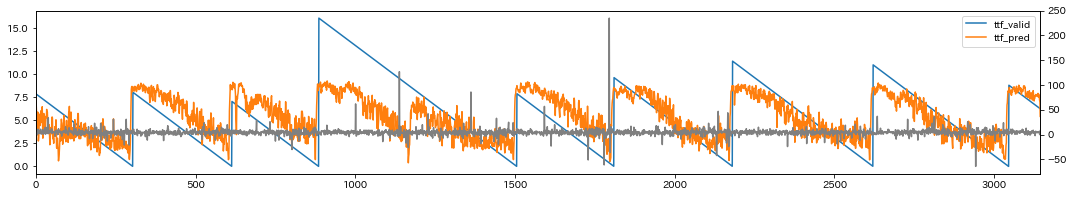

In [24]:
ax1 = df_acc[['ttf_valid','ttf_pred']].plot(figsize=(18,3))
df_acc['acoustic_data'].plot(figsize=(18,3), ax=ax1.twinx(), color='grey')

In [35]:
X_vaild = None
y_valid = None
acoustic_vals = None

In [57]:
df_acc

,ttf_valid,ttf_pred
0,1.209499,3.526301
1,1.209499,3.794419
2,1.209499,3.895686
3,1.209499,3.760664
4,1.209499,4.376159
5,1.209499,3.130667
6,1.209499,3.755023
7,1.209499,4.025277
8,1.209499,3.445753
9,1.209498,3.651126


In [15]:
# returns a compiled model identical to the previous one
models = []
for i in range(fold):
    path_model = "../model/model_CuDNNGRU_Fold-" + str(i+1) + ".hdf5"
    print('i=', i , path_model)
    mdl = load_model(path_model)
    models.append(mdl)

i= 0 ../model/model_CuDNNGRU_Fold-1.hdf5
i= 1 ../model/model_CuDNNGRU_Fold-2.hdf5
i= 2 ../model/model_CuDNNGRU_Fold-3.hdf5
i= 3 ../model/model_CuDNNGRU_Fold-4.hdf5


In [40]:
def make_submission(models, dir_input='../input/'):
    
    # Load submission file
    submission = pd.read_csv('../input/sample_submission.csv', index_col='seg_id', dtype={"time_to_failure": np.float32})
    
    # Load Test Data
    
    # Load each test data, create the feature matrix, get numeric prediction
    x_test = []
    print('Load test data...')
    for i, seg_id in enumerate(tqdm_notebook(submission.index)):
        seg = pd.read_csv('../input/test/' + seg_id + '.csv')
        x_test_seg = data_generator.convert_test(seg['acoustic_data'].values)
        x_test.append(x_test_seg)
    
    n_test = len(x_test)
    n_sample = x_test[0].shape[1]
    n_feature = x_test[0].shape[2]
    x_test = np.array(x_test).reshape(n_test, n_sample, n_feature)
    
    # Predict Test Data 
    print('Predict test data...')
    submission['time_to_failure'] = 0
    for j, mdl in enumerate(tqdm_notebook(models)):
        y_test_mdl = mdl.predict(x_test).ravel()
        submission['time_to_failure_fold_' + str(j+1)] = y_test_mdl
        submission['time_to_failure'] += y_test_mdl/len(models)
    
    return submission

In [41]:
submission = make_submission(models=models, dir_input='../input/')

# Save
submission.head()

submission.iloc[:,0:1].to_csv('submission_CuDNNGRU_Fold_'+ str(fold)+'.csv')
submission.to_csv('submission_CuDNNGRU_Fold_'+ str(fold)+'_Full.csv')

Load test data...


Predict test data...


In [35]:
seg = pd.read_csv('../input/test/' + 'seg_00030f.csv')
x_test = []
x_test_seg = data_generator.convert_test(seg['acoustic_data'].values)

x_test.append(x_test_seg)
x_test.append(x_test_seg)
x_test.append(x_test_seg)
x_test.append(x_test_seg)

n_test = len(x_test)
n_sample = x_test[0].shape[1]
n_feature = x_test[0].shape[2]
x_test = np.array(x_test).reshape(n_test, n_sample, n_feature)
    
y_test_mdl = models[0].predict(x_test).reshape(-1,1)

In [39]:
y_test_mdl.reshape(-1,1)

array([[3.8461936],
       [3.8461936],
       [3.8461936],
       [3.8461936]], dtype=float32)

In [23]:
submission.head()

,time_to_failure,time_to_failure_fold_1,time_to_failure_fold_2,time_to_failure_fold_3,time_to_failure_fold_4
seg_id,,,,,
seg_00030f,0.704980,3.846194,3.447338,2.891323,2.819921
seg_0012b5,0.864656,5.065614,4.723202,5.106661,3.458624
seg_00184e,1.461332,5.929936,7.564002,5.841316,5.845327
seg_003339,2.104985,8.411037,8.581892,8.191284,8.419942
seg_0042cc,1.327257,6.876308,6.752389,6.420457,5.309028


In [ ]:
#model.summary()

In [224]:
# Compile and fit model
model.compile(optimizer=adam(lr=0.0005), loss="mae")

history = model.fit_generator(train_gen,
                              steps_per_epoch=1000,
                              epochs=5,
                              verbose=1,
                              callbacks=cb,
                              validation_data=valid_gen,
                              validation_steps=50)

Epoch 1/5
1000/1000 [==============================] - 65s 65ms/step - loss: 2.6927 - val_loss: 1.4755
Epoch 2/5
1000/1000 [==============================] - 80s 80ms/step - loss: 2.3687 - val_loss: 1.4930
Epoch 3/5
1000/1000 [==============================] - 103s 103ms/step - loss: 2.3436 - val_loss: 1.5085
Epoch 4/5
1000/1000 [==============================] - 125s 125ms/step - loss: 2.3249 - val_loss: 1.4234
Epoch 5/5
1000/1000 [==============================] - 117s 117ms/step - loss: 2.3264 - val_loss: 1.4405


In [ ]:
model.save(filepath)

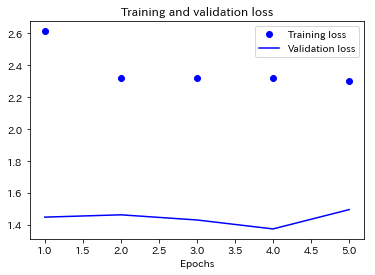

In [84]:
# Visualize accuracies
import matplotlib.pyplot as plt

def perf_plot(history, what = 'loss'):
    x = history.history[what]
    val_x = history.history['val_' + what]
    epochs = np.asarray(history.epoch) + 1
    
    plt.plot(epochs, x, 'bo', label = "Training " + what)
    plt.plot(epochs, val_x, 'b', label = "Validation " + what)
    plt.title("Training and validation " + what)
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    return None

perf_plot(history)

In [ ]:
# Load submission file
submission = pd.read_csv('../input/sample_submission.csv', index_col='seg_id', dtype={"time_to_failure": np.float32})

# Load each test data, create the feature matrix, get numeric prediction
for i, seg_id in enumerate(tqdm(submission.index)):
  #  print(i)
    seg = pd.read_csv('../input/test/' + seg_id + '.csv')
    x = seg['acoustic_data'].values
    submission.time_to_failure[i] = model.predict(np.expand_dims(create_X(x), 0))

submission.head()

# Save
submission.to_csv('submission.csv')

In [ ]:
# https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb
from keras import activations, regularizers, initializers, constraints
from keras.engine import Layer, InputSpec

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [ ]:
# This is NN LSTM Model creation
def model_lstm(input_shape, feat_shape):
    inp = Input(shape=(input_shape[1], input_shape[2],))
    feat = Input(shape=(feat_shape[1],))

    bi_lstm = Bidirectional(CuDNNLSTM(128, return_sequences=True), merge_mode='concat')(inp)
    bi_gru = Bidirectional(CuDNNGRU(64, return_sequences=True), merge_mode='concat')(bi_lstm)
    
    attention = Attention(input_shape[1])(bi_gru)
    
    x = concatenate([attention, feat], axis=1)
    x = Dense(64, activation="relu")(x)
    x = Dense(1, activation="sigmoid")(x)
    
    model = Model(inputs=[inp, feat], outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[matthews_correlation])
    
    return model

In [ ]:
# def classic_sta_lta(x, length_sta, length_lta):
#     """
#     STA/LTA (short-term average/long-term average)
#     For noise-free seismograms, the maximum value of the numerical derivative of the STA/LTA ratio is close to the time of the first arrival.
#     (https://en.wikipedia.org/wiki/First_break_picking)
#     length_staだけズラした波形の振幅の累積二乗の比率/length_finだけズラした波形の振幅の累積二乗の比率
#     """
#     sta = np.cumsum(x ** 2)

#     # Convert to float
#     sta = np.require(sta, dtype=np.float)

#     # Copy for LTA
#     lta = sta.copy()

#     # Compute the STA and the LTA
#     sta[length_sta:] = sta[length_sta:] - sta[:-length_sta]
#     sta /= length_sta
#     sta[:length_lta - 1] = 0 # Pad zeros
    
#     lta[length_lta:] = lta[length_lta:] - lta[:-length_lta]
#     lta /= length_lta
#     # Avoid division by zero by setting zero values to tiny float
#     dtiny = np.finfo(0.0).tiny
#     idx = lta < dtiny
#     lta[idx] = dtiny

#     return sta / lta

# def max_abs_diff_calssic_sta_lat(x, length_sta, length_lta):
#     """
#     x:1D-array(m*1)
#     return:float
#     """
#     csl = classic_sta_lta(x, length_sta, length_lta)
#     return np.abs(np.diff(csl)).max()

In [ ]:
# def add_trend_feature(mat, abs_values=False):
#     """
#     単回帰を用いてデータの平均傾きを出力
#     """
#     trends = np.zeros([mat.shape[0],1])
#     for i in range(mat.shape[0]):
#         arr = mat[i]
#         idx = np.array(range(len(arr)))
#         if abs_values:
#             arr = np.abs(arr)
#         lr = LinearRegression()
#         lr.fit(idx.reshape(-1, 1), arr)
#         trends[i] = lr.coef_[0]
#     return trends

In [ ]:
# # Helper function for the data generator. Extracts mean, standard deviation, and quantiles per time step.
# # Can easily be extended. Expects a two dimensional array.
# def extract_features(z):
#     """
#     z:2D-array(m*n)
#     return:features(m*x)
#     """
#     features = np.c_[z.mean(axis=1), 
#                      z.min(axis=1),
#                      z.max(axis=1),
#                      z.std(axis=1),
                               
#                      np.abs(z).mean(axis=1),
#                      np.abs(z).std(axis=1),

#                      np.median(z, axis=1),
#                      stats.kurtosis(z, axis=1),
#                      stats.skew(z, axis=1),

#                      #np.abs(hilbert(x_in)).mean()
#                      #convolve(x_in, hann(150), mode='same') / sum(hann(150))).mean()


#                      #     for i in range(z.shape[0]): 
#                     #         zs_i = pd.Series(z[i])   

#                     #         if z.shape[1] >= 100:
#                     #             #df_ext.loc[i, 'mad_stalat_10-50'] = max_abs_diff_calssic_sta_lat(zs_i, length_sta=10, length_lta=50)
#                     #             #df_ext.loc[i, 'mad_stalat_33-66'] = max_abs_diff_calssic_sta_lat(zs_i, length_sta=33, length_lta=66)
#                     #             df_ext.loc[i, 'mad_stalat_33-99'] = max_abs_diff_calssic_sta_lat(zs_i, length_sta=33, length_lta=99)
#                     #         if z.shape[1] >= 150:
#                     #             #df_ext.loc[i, 'mad_stalat_10-100'] = max_abs_diff_calssic_sta_lat(zs_i, length_sta=10, length_lta=100)
#                     #             # df_ext.loc[i, 'mad_stalat_33-123'] = max_abs_diff_calssic_sta_lat(zs_i, length_sta=33, length_lta=123)
#                     #             df_ext.loc[i, 'mad_stalat_40-100'] = max_abs_diff_calssic_sta_lat(zs_i, length_sta=40, length_lta=100)
#                     #             #df_ext.loc[i, 'mad_stalat_50-150'] =  max_abs_diff_calssic_sta_lat(zs_i, length_sta=50, length_lta=150)

#                     #         # Windowを変化させrolling特徴量を生成
#                     #         for window in [10]: #,30]:
#                     #             if z.shape[1] < window+10:
#                     #                 continue    
#                     #             z_roll_std = zs_i.rolling(window).std().dropna().values
#                     #             z_roll_mean = zs_i.rolling(window).mean().dropna().values   

#                     #             df_ext.loc[i, 'ave_roll_std_wd_' + str(window)] = z_roll_std.mean()          
#                     #             df_ext.loc[i, 'std_roll_std_wd_' + str(window)] = z_roll_std.std()
#                     # #             df_ext.loc[i, 'max_roll_std_wd_' + str(window)] = z_roll_std.max()
#                     # #             df_ext.loc[i, 'min_roll_std_wd_' + str(window)] = z_roll_std.min()
#                     #             df_ext.loc[i, 'ave_roll_mean_wd_' + str(window)] = z_roll_mean.mean()
#                     #             df_ext.loc[i, 'std_roll_mean_wd_' + str(window)] = z_roll_mean.std()
#                     # #             df_ext.loc[i, 'max_roll_mean_wd_' + str(window)] = z_roll_mean.max()
#                     # #             df_ext.loc[i, 'min_roll_mean_wd_' + str(window)] = z_roll_mean.min()

#                     #     df_ext.dropna(axis=1, inplace=True)
#                 ]
#     return features

In [ ]:
# # For a given ending position "last_index", we split the last 150'000 values 
# # of "x" into 150 pieces of length 1000 each. So n_steps * step_length should equal 150'000.
# # From each piece, a set features are extracted. This results in a feature matrix 
# # of dimension (150 time steps x features).  
# def create_X(x, last_index=None, n_steps=150, step_length=1000):
#     if last_index == None:
#         last_index=len(x)
       
#     assert last_index - n_steps * step_length >= 0

#     # Reshaping and approximate standardization with mean 5 and std 3.
#     temp = (x[(last_index - n_steps * step_length):last_index].reshape(n_steps, -1) - 5 ) / 3
    
#     # Extracts features of sequences of full length 1000, of the last 100 and 10 observations. 
#     return np.c_[extract_features(temp),
#                  extract_features(temp[:, -step_length // 10:]),
#                  extract_features(temp[:, -step_length // 100:])]

In [ ]:
# # Query "create_X" to figure out the number of features
# data_tr = create_X(float_data[0:150000])
# n_features = data_tr.shape[1]
# print("Our RNN is based on %i features"% n_features)

In [43]:
data=float_data[:1500000]
data_generator = DataGenerator(acoustic_data=data[:,0], time_to_failures=data[:,1], n_segment=3, n_step=150, step_length=1000, batch_size=5, verbose=0)
data_generator.set_valid_segment(2)

In [44]:
data_generator.segment_last_indexs

[0, 500000, 1000000, 1499999]

In [30]:
data_generator.min_valid_index

1000000

In [31]:
data_generator.max_valid_index

1499999

In [32]:
for s,t in data_generator.generate_valid():
    break

In [244]:
for s,t in data_generator.generate_train():
    break

In [303]:
# # The generator endlessly selects "batch_size" ending positions of sub-time series. For each ending position,
# # the "time_to_failure" serves as target, while the features are created by the function "create_X".
# def generator(data, min_index=0, max_index=None, batch_size=16, n_steps=150, step_length=1000):
#     if max_index is None:
#         max_index = len(data) - 1
    
#     last_index_to_gen_sample = {}
#     while True:
#         # Pick indices of ending positions
#         rows = np.random.randint(min_index + n_steps * step_length, max_index, size=batch_size)
         
#         # Initialize feature matrices and targets
#         samples = np.zeros((batch_size, n_steps, n_features))
#         targets = np.zeros(batch_size, )
        
#         for j, r in enumerate(rows):
#             if r not in last_index_to_gen_sample:
#                 last_index_to_gen_sample[r] = create_X(data[:, 0], last_index=r, n_steps=n_steps, step_length=step_length)
#             samples[j] = last_index_to_gen_sample[r] 
#             targets[j] = data[r - 1, 1]
#         yield samples, targets

In [304]:
# Position of second (of 16) earthquake. Used to have a clean split between train and validation
#second_earthquake = 50085877

In [ ]:
    #print('n_feature=', n_feature)
    #print('segment_last_indexs=', data_generator.segment_last_indexs)